# Data Preparation

In [1]:
import pandas as pd

import os
 
# Base input path

base_path = '/kaggle/input'
 
# File names to import

file_names = ['Datasets.csv', 'Forums.csv', 'ForumTopics.csv']
 
# Create a dictionary to hold DataFrames

dataframes = {}
 
# Walk through the input directory

for dirname, _, filenames in os.walk(base_path):

    for file in file_names:

        if file in filenames:

            file_path = os.path.join(dirname, file)

            dataframes[file.split('.')[0]] = pd.read_csv(file_path)

            print(f'Loaded {file} into DataFrame.')
 
# Access individual DataFrames

datasets_df = dataframes['Datasets']

forums_df = dataframes['Forums']

forum_topics_df = dataframes['ForumTopics']

/tmp/ipykernel_13/42381242.py:27: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[file.split('.')[0]] = pd.read_csv(file_path)


Loaded Datasets.csv into DataFrame.
Loaded Forums.csv into DataFrame.
Loaded ForumTopics.csv into DataFrame.


In [2]:
print("datasets_df Shape:",datasets_df.shape)
print("forums_df Shape:",forums_df.shape)
print("forum_topics_df Shape:",forum_topics_df.shape)

datasets_df Shape: (508001, 16)
forums_df Shape: (567993, 3)
forum_topics_df Shape: (461394, 13)


In [3]:
# Step 1: Group ForumTopics by forumId and count how many topics each forum has
forum_topic_counts = forum_topics_df.groupby('ForumId').size().reset_index(name='TotalForumTopics')
 
if 'TotalForumTopics' in datasets_df.columns:
    datasets_df = datasets_df.drop(columns=['TotalForumTopics'])
 
# Step 2: Merge this count into the datasets_df based on forumId
datasets_df = datasets_df.merge(forum_topic_counts, how='left', on='ForumId')
 
# Step 3: Fill NaN with 0 (for datasets with no forum topics)
datasets_df['TotalForumTopics'] = datasets_df['TotalForumTopics'].fillna(0).astype(int)
 
# Optional: Preview the result
datasets_df.head(15)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate,TotalForumTopics
0,402034,2188609,2188609.0,NaN,771250.0,792478.0,414197,Dataset,10/31/2019 01:07:32,10/31/2019,2695,127,1,2,NaN,NaN,0
1,402031,3792299,3792299.0,NaN,771247.0,792475.0,414194,Dataset,10/31/2019 00:58:15,10/31/2019,1789,36,2,3,NaN,NaN,0
2,39875,1,1891177.0,NaN,285978.0,298457.0,48350,Dataset,08/01/2018 00:10:55,08/01/2018,7583,0,16,2,NaN,NaN,0
3,13,1132983,NaN,4.0,7651.0,7651.0,975,Dataset,12/18/2015 23:16:00,02/06/2018,252904,47464,406,452,2.0,08/05/2021,8
4,14,993,NaN,4.0,827864.0,850525.0,977,Dataset,12/21/2015 19:40:00,02/06/2018,532797,98249,904,495,2.0,06/29/2020,9
5,16,993,NaN,3.0,799881.0,821798.0,984,Dataset,12/28/2015 06:04:45,02/06/2018,112843,24950,142,209,3.0,11/06/2019,5
6,17,993,NaN,3.0,742210.0,762847.0,989,Dataset,01/07/2016 00:38:08,02/06/2018,778254,125018,1118,588,1.0,11/06/2019,13
7,18,500099,NaN,229.0,2157.0,2157.0,993,Dataset,01/08/2016 21:12:10,02/06/2018,1121862,227759,2356,1089,1.0,11/06/2019,17
8,19,1,NaN,7.0,420.0,420.0,997,Dataset,01/12/2016 00:33:31,02/06/2018,2562904,716221,4289,7440,1.0,11/06/2019,32
9,20,866896,NaN,373.0,4275.0,4275.0,999,Dataset,01/13/2016 02:01:43,02/06/2018,513923,78768,1251,547,1.0,11/06/2019,7


# EDA

**1. Basic information and missing value check**

In [4]:
# Info about columns, datatypes, and nulls
datasets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508001 entries, 0 to 508000
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          508001 non-null  int64  
 1   CreatorUserId               508001 non-null  int64  
 2   OwnerUserId                 505433 non-null  float64
 3   OwnerOrganizationId         2568 non-null    float64
 4   CurrentDatasetVersionId     507761 non-null  float64
 5   CurrentDatasourceVersionId  507750 non-null  float64
 6   ForumId                     508001 non-null  int64  
 7   Type                        508001 non-null  object 
 8   CreationDate                508001 non-null  object 
 9   LastActivityDate            508001 non-null  object 
 10  TotalViews                  508001 non-null  int64  
 11  TotalDownloads              508001 non-null  int64  
 12  TotalVotes                  508001 non-null  int64  
 13  TotalKernels  

In [5]:
# Descriptive statistics (for all columns)
datasets_df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate,TotalForumTopics
count,5.080010e+05,5.080010e+05,5.054330e+05,2568.000000,5.077610e+05,5.077500e+05,5.080010e+05,508001,508001,508001,5.080010e+05,508001.000000,508001.000000,508001.000000,21121.000000,29232,508001.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,506947,2852,NaN,NaN,NaN,NaN,NaN,1868,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dataset,09/26/2024 07:06:56,06/21/2024,NaN,NaN,NaN,NaN,NaN,11/06/2019,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508001,5,5109,NaN,NaN,NaN,NaN,NaN,838,NaN
mean,3.897988e+06,1.101210e+07,1.105628e+07,1250.682632,6.502690e+06,6.660794e+06,4.034489e+06,NaN,NaN,NaN,1.945645e+03,257.483731,4.568981,1.677644,2.874343,NaN,0.057596
std,2.262069e+06,7.264541e+06,7.249639e+06,1274.078892,3.615291e+06,3.748673e+06,2.392225e+06,NaN,NaN,NaN,2.867073e+04,4388.875637,92.585083,34.839634,0.376544,NaN,1.159261
min,6.000000e+00,1.000000e+00,3.680000e+02,2.000000,5.800000e+01,5.800000e+01,7.620000e+02,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,1.901726e+06,4.789522e+06,4.848744e+06,265.000000,3.162335e+06,3.212028e+06,1.925091e+06,NaN,NaN,NaN,4.300000e+01,3.000000,0.000000,0.000000,3.000000,NaN,0.000000
50%,3.856259e+06,1.017779e+07,1.023715e+07,959.000000,6.757686e+06,6.842599e+06,3.931446e+06,NaN,NaN,NaN,1.440000e+02,8.000000,0.000000,0.000000,3.000000,NaN,0.000000
75%,5.822515e+06,1.652242e+07,1.654869e+07,1606.000000,9.605876e+06,9.828493e+06,6.035140e+06,NaN,NaN,NaN,9.130000e+02,28.000000,1.000000,1.000000,3.000000,NaN,0.000000


| Row Name   | Explanation                                                                    |
| ---------- | ------------------------------------------------------------------------------ |
| **count**  | Number of non-missing (non-NaN, non-None) values in the column.                |
| **unique** | Number of unique values in the column (only for categorical/string columns).   |
| **top**    | The most frequent value (mode) in the column (for categorical/string columns). |
| **freq**   | Frequency of the most frequent value (how many times "top" appears).           |
| **mean**   | Average value (only for numeric columns).                                      |
| **std**    | Standard deviation, measures spread of the values (only for numeric columns).  |
| **min**    | Minimum value (only for numeric columns).                                      |
| **25%**    | 25th percentile (the value below which 25% of the data fall, numeric only).    |
| **50%**    | 50th percentile (the median, numeric only).                                    |
| **75%**    | 75th percentile (the value below which 75% of the data fall, numeric only).    |
| **max**    | Maximum value (only for numeric columns).                                      |


In [6]:
# Check for missing values percentages
(datasets_df.isnull().sum() / len(datasets_df)) * 100


Id                             0.000000
CreatorUserId                  0.000000
OwnerUserId                    0.505511
OwnerOrganizationId           99.494489
CurrentDatasetVersionId        0.047244
CurrentDatasourceVersionId     0.049409
ForumId                        0.000000
Type                           0.000000
CreationDate                   0.000000
LastActivityDate               0.000000
TotalViews                     0.000000
TotalDownloads                 0.000000
TotalVotes                     0.000000
TotalKernels                   0.000000
Medal                         95.842331
MedalAwardDate                94.245681
TotalForumTopics               0.000000
dtype: float64

**2. Target variable (Y) distribution analysis**

In [7]:
y_cols = ['TotalViews', 'TotalVotes', 'TotalForumTopics']

*2.1. Distribution & Box Plot*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


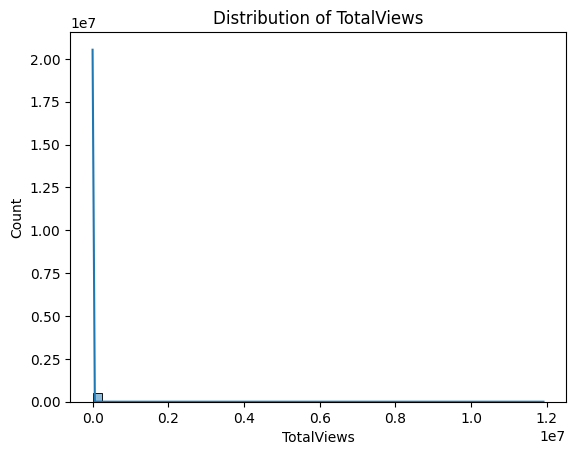

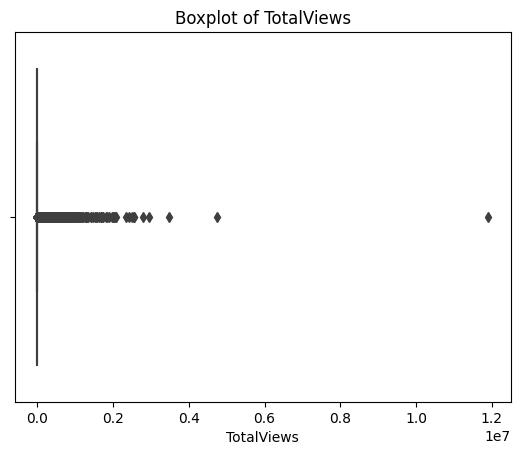

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


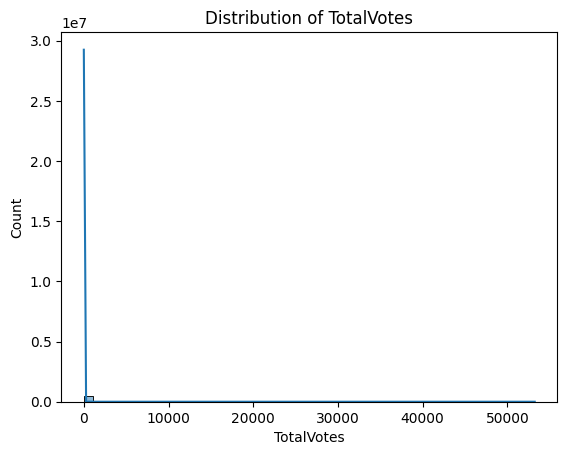

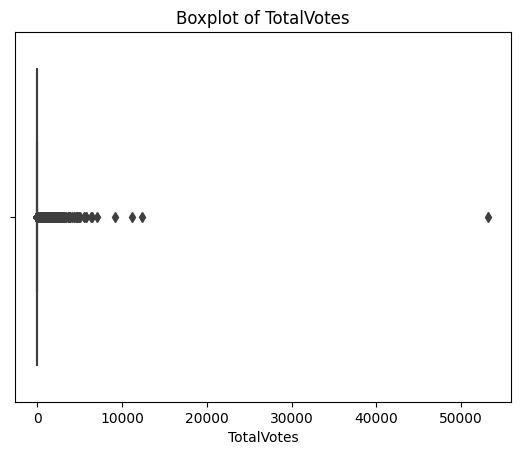

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


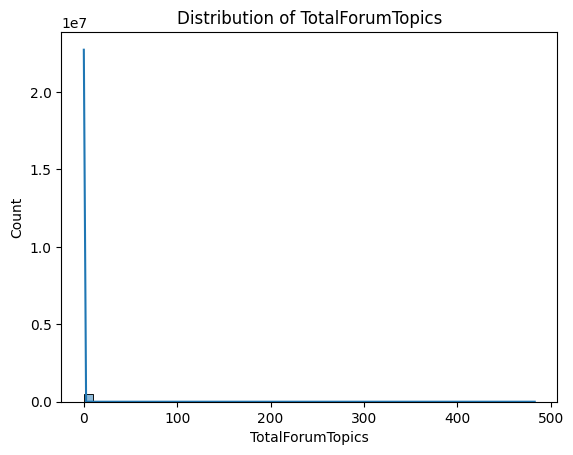

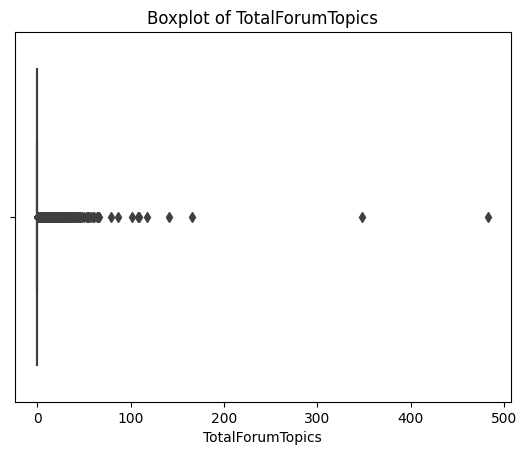

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ['TotalViews', 'TotalVotes', 'TotalForumTopics']:
    plt.figure()
    sns.histplot(datasets_df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure()
    sns.boxplot(x=datasets_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

*2.2. Correlation Matrix*

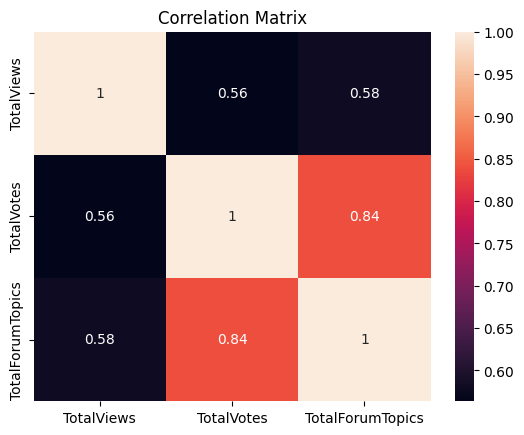

In [9]:
corr = datasets_df[['TotalViews', 'TotalVotes', 'TotalForumTopics']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

*2.3. Logarithmic transformation*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


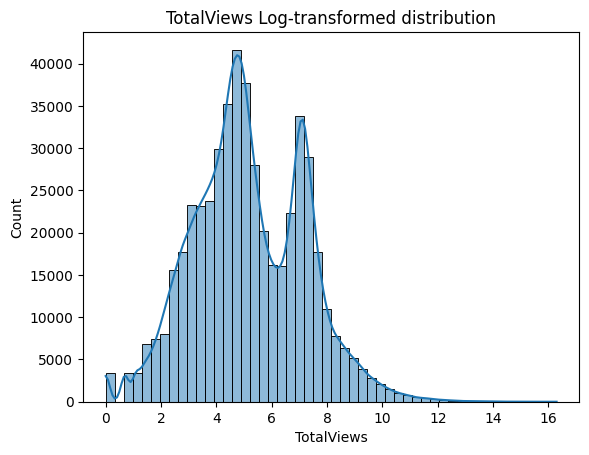

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


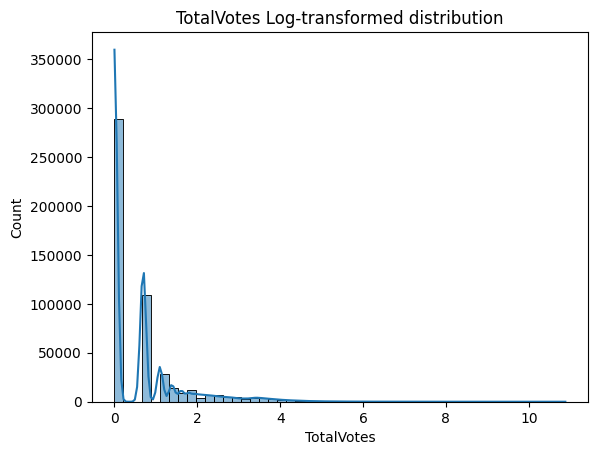

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


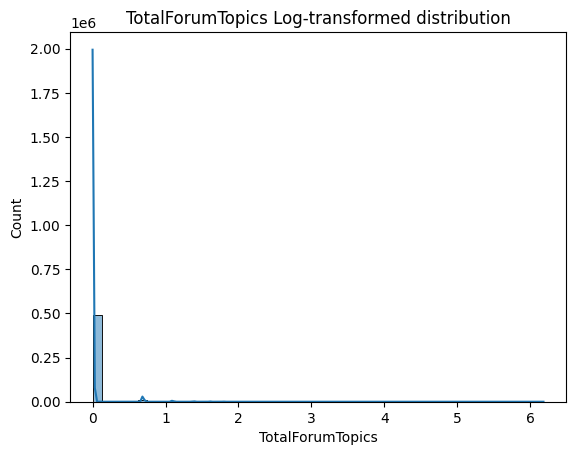

In [10]:
import numpy as np

for col in y_cols:
    plt.figure()
    sns.histplot(np.log1p(datasets_df[col]), bins=50, kde=True)
    plt.title(f'{col} Log-transformed distribution')
    plt.show()

**3. Feature (X) distribution analysis**

In [11]:
num_cols = [
    'TotalDownloads', 'TotalKernels', 'Medal',
    'OwnerUserId', 'OwnerOrganizationId',
    'CurrentDatasetVersionId', 'CurrentDatasourceVersionId'
]

cat_cols = [
    'Type'
]

time_cols = ['CreationDate', 'LastActivityDate', 'MedalAwardDate']

*3.1 Numerical features*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


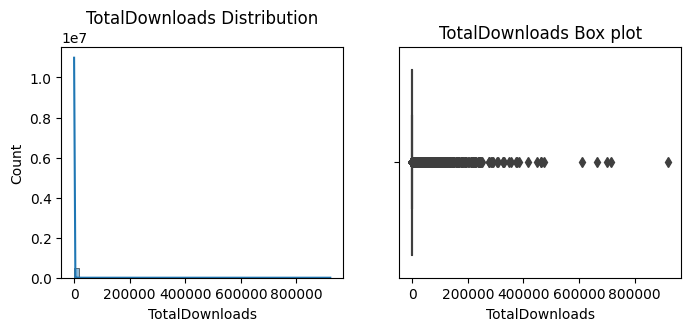

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


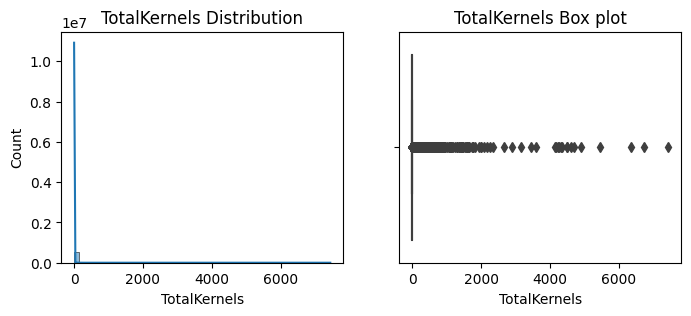

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


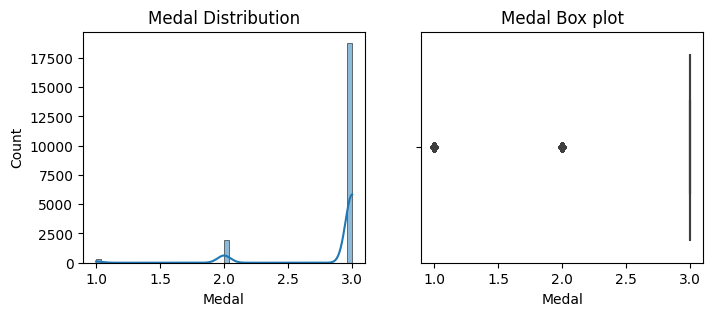

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


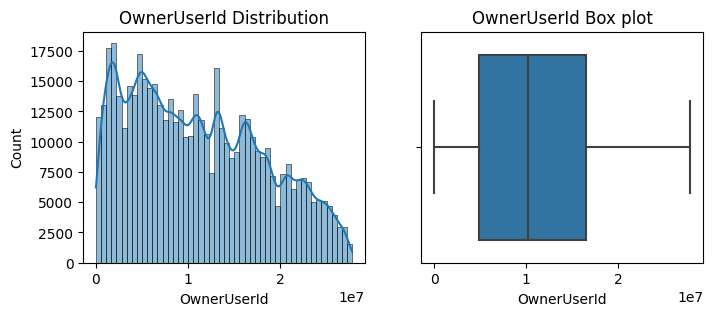

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


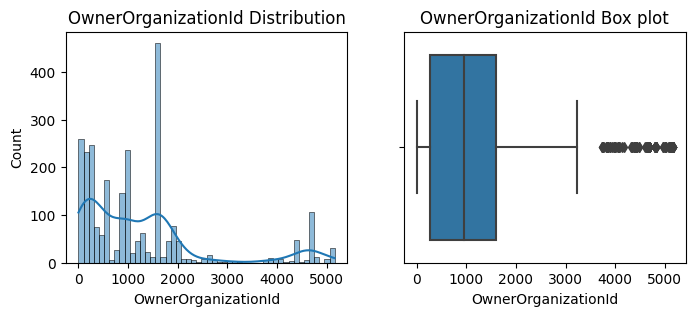

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


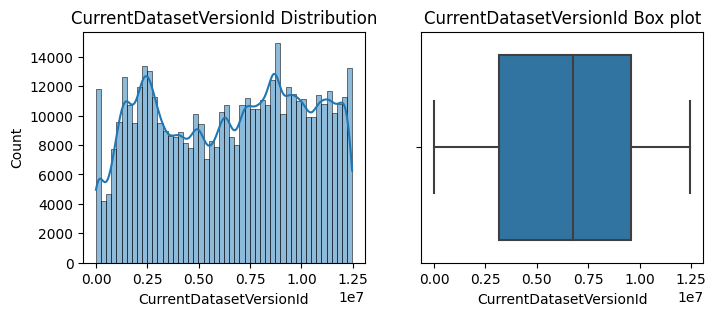

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


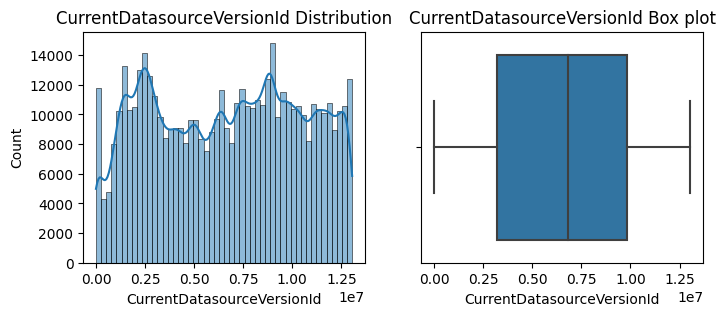

In [12]:
for col in num_cols:
    if col in datasets_df.columns:
        plt.figure(figsize=(8,3))
        plt.subplot(1,2,1)
        sns.histplot(datasets_df[col].dropna(), bins=50, kde=True)
        plt.title(f'{col} Distribution')
        plt.subplot(1,2,2)
        sns.boxplot(x=datasets_df[col].dropna())
        plt.title(f'{col} Box plot')
        plt.show()

*3.2. Category Statistics*

Type Number of each category:
 Type
Dataset    508001
Name: count, dtype: int64


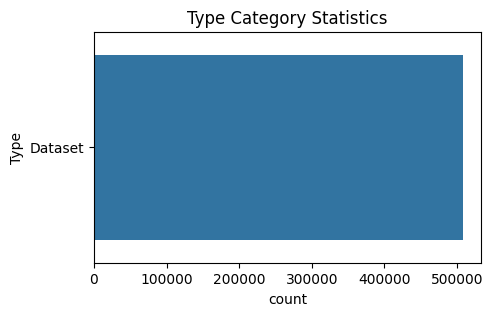

In [13]:
for col in cat_cols:
    if col in datasets_df.columns:
        print(f"{col} Number of each category:\n", datasets_df[col].value_counts())
        plt.figure(figsize=(5,3))
        sns.countplot(y=col, data=datasets_df, order=datasets_df[col].value_counts().index)
        plt.title(f'{col} Category Statistics')
        plt.show()

*3.3. Missing and unique value analysis*

In [14]:
print("Missing values ​​for features：\n", datasets_df[num_cols + cat_cols].isnull().sum(),"\n")

for col in num_cols + cat_cols:
    if col in datasets_df.columns:
        print(f"{col} Number of unique values: {datasets_df[col].nunique()}")

Missing values ​​for features：
 TotalDownloads                     0
TotalKernels                       0
Medal                         486880
OwnerUserId                     2568
OwnerOrganizationId           505433
CurrentDatasetVersionId          240
CurrentDatasourceVersionId       251
Type                               0
dtype: int64 

TotalDownloads Number of unique values: 7635
TotalKernels Number of unique values: 489
Medal Number of unique values: 3
OwnerUserId Number of unique values: 187339
OwnerOrganizationId Number of unique values: 387
CurrentDatasetVersionId Number of unique values: 507761
CurrentDatasourceVersionId Number of unique values: 507750
Type Number of unique values: 1


**4. Feature Correlation and Extreme Value Analysis**

*4.1. Relationship between features and targets (X vs Y)*

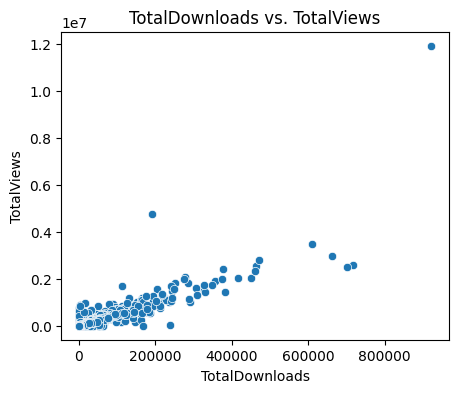

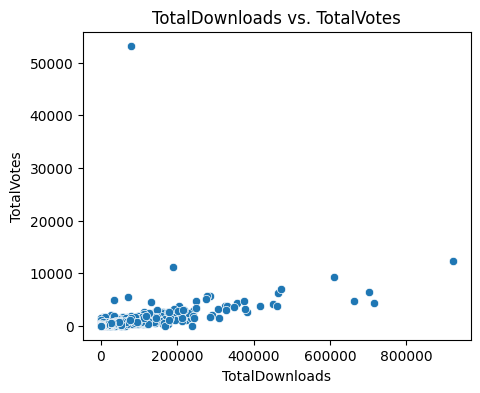

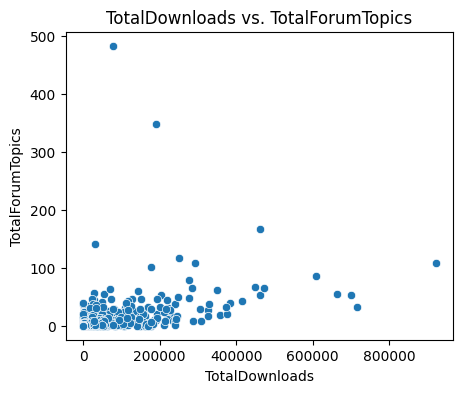

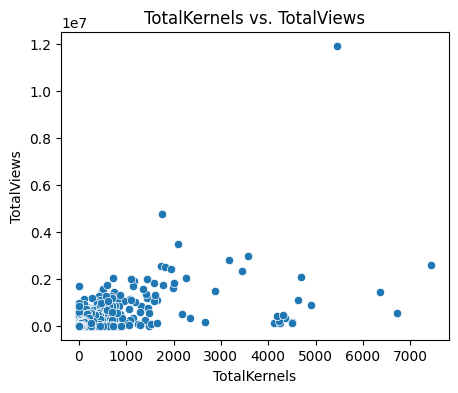

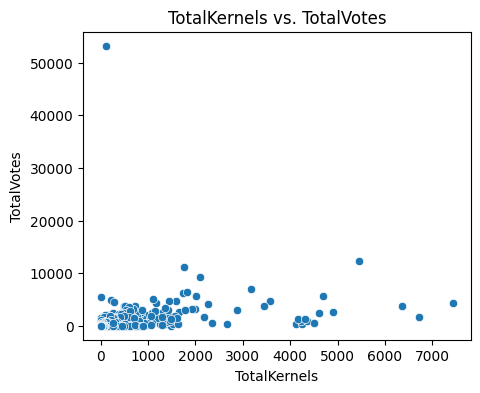

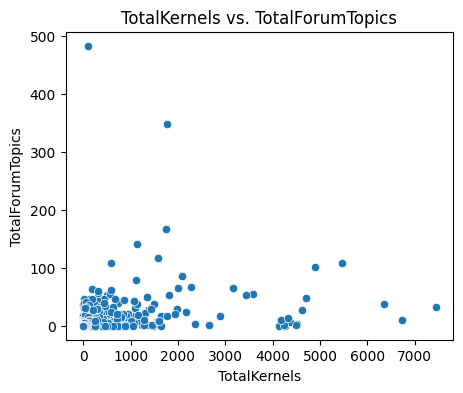

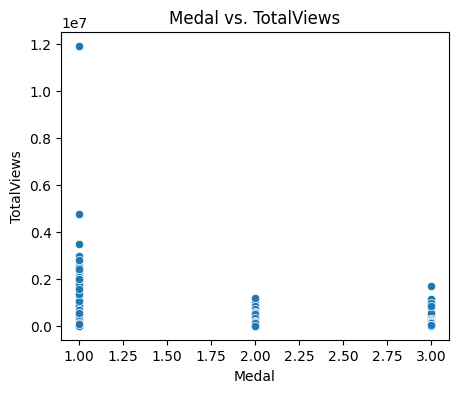

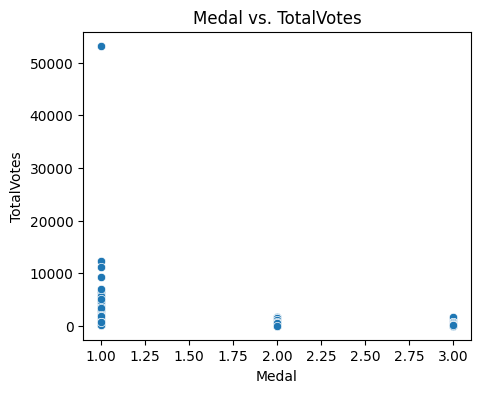

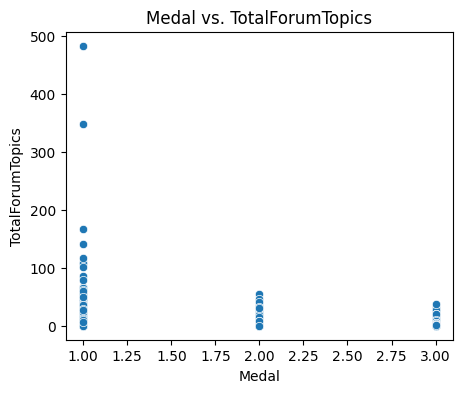

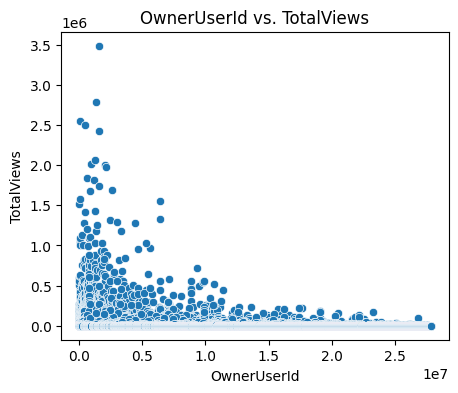

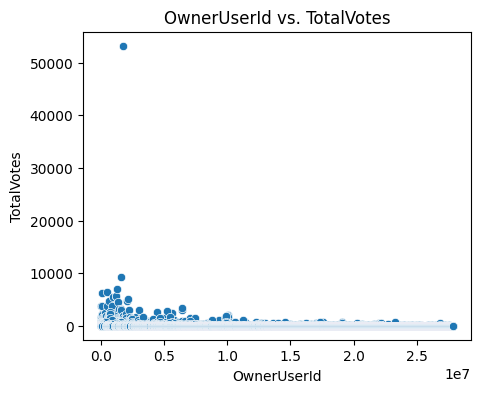

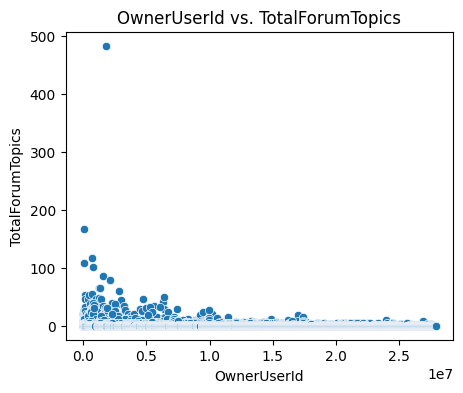

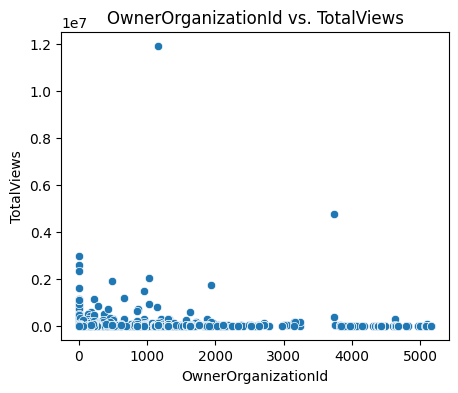

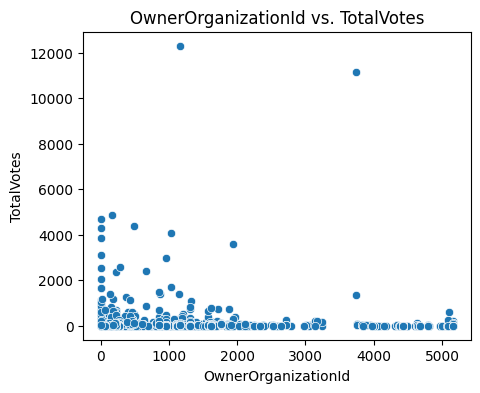

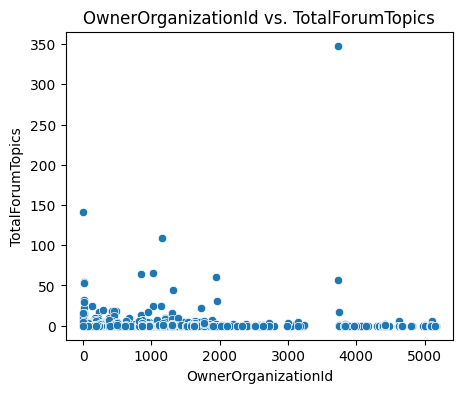

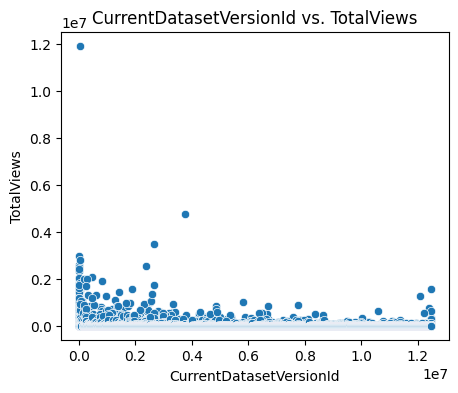

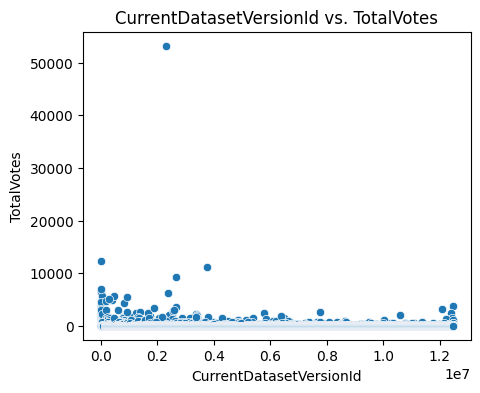

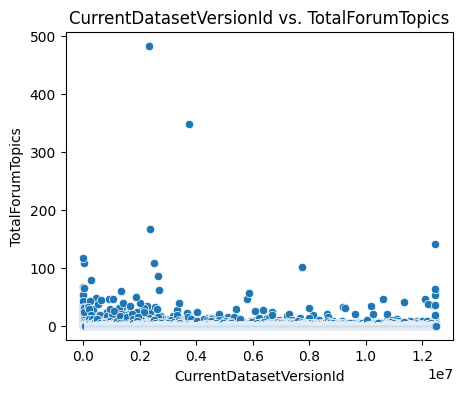

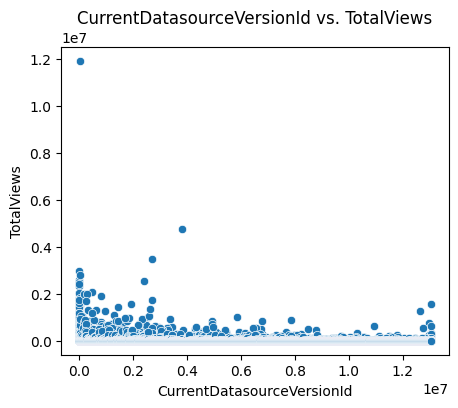

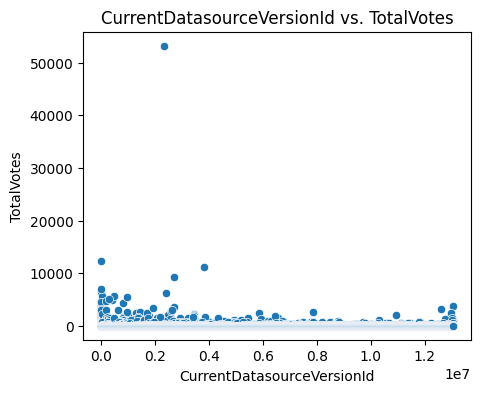

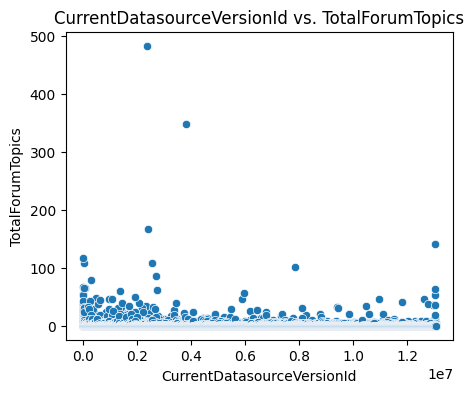

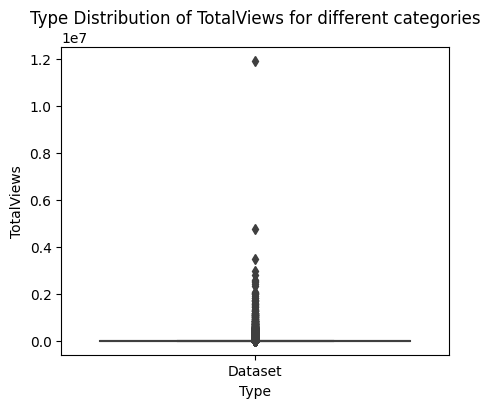

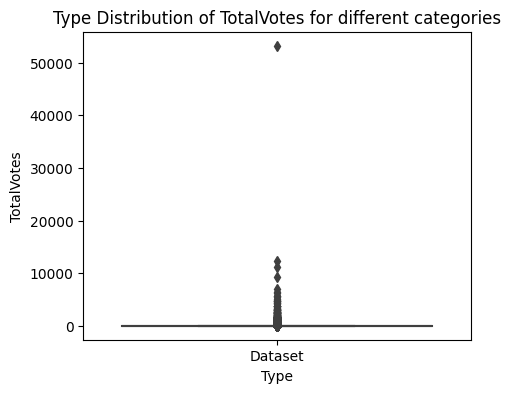

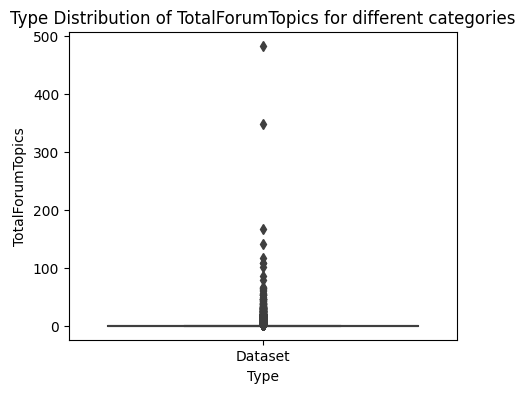

In [15]:
for x in num_cols:
    if x in datasets_df.columns:
        for y in y_cols:
            plt.figure(figsize=(5,4))
            sns.scatterplot(x=x, y=y, data=datasets_df)
            plt.title(f'{x} vs. {y}')
            plt.show()
for x in cat_cols:
    if x in datasets_df.columns:
        for y in y_cols:
            plt.figure(figsize=(5,4))
            sns.boxplot(x=x, y=y, data=datasets_df)
            plt.title(f'{x} Distribution of {y} for different categories')
            plt.show()

*4.2. Correlation between features (x-x, x-y)*

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


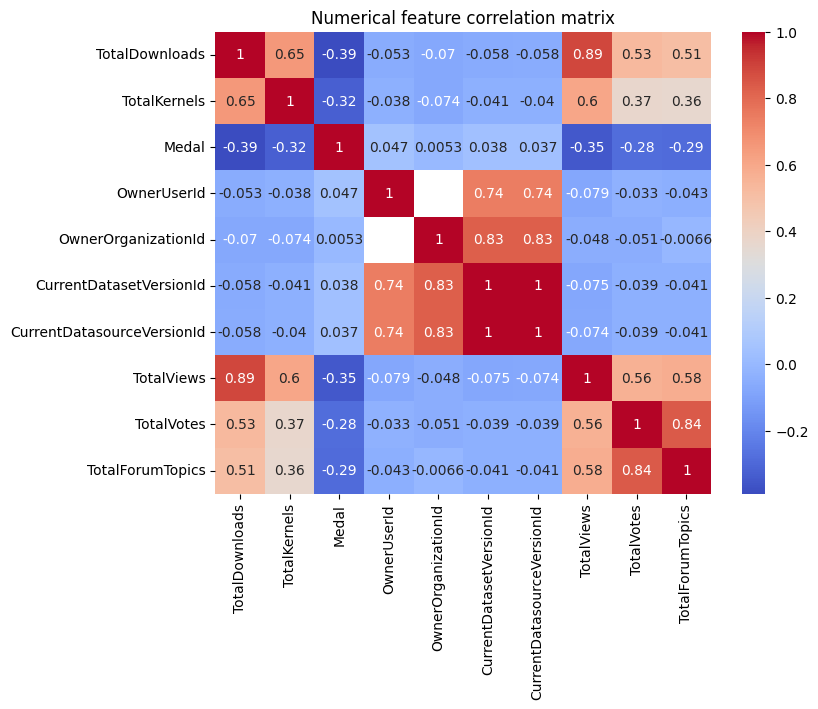

In [16]:
corr = datasets_df[num_cols + y_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numerical feature correlation matrix')
plt.show()

*4.3. Outlier and extreme value detection*

In [17]:
for col in num_cols + y_cols:
    if col in datasets_df.columns:
        print(f"{col} Maximum/Minimum: {datasets_df[col].max()}/{datasets_df[col].min()}")

TotalDownloads Maximum/Minimum: 921977/0
TotalKernels Maximum/Minimum: 7440/0
Medal Maximum/Minimum: 3.0/1.0
OwnerUserId Maximum/Minimum: 27859162.0/368.0
OwnerOrganizationId Maximum/Minimum: 5161.0/2.0
CurrentDatasetVersionId Maximum/Minimum: 12473615.0/58.0
CurrentDatasourceVersionId Maximum/Minimum: 13049149.0/58.0
TotalViews Maximum/Minimum: 11910738/0
TotalVotes Maximum/Minimum: 53227/0
TotalForumTopics Maximum/Minimum: 483/0


# DATA PRE-PROCESSING

In [18]:
df_before_preprocessing = datasets_df



# Drop columns with >50% missing values
high_null_cols = datasets_df.columns[datasets_df.isnull().mean() > 0.5]
print('Columns with >50% missing values:',high_null_cols)
datasets_df = datasets_df.loc[:, datasets_df.isnull().mean() < 0.5]

# Drop columns with only one unique value
single_value_cols = [col for col in datasets_df.columns if datasets_df[col].nunique() == 1]
print('Columns with only one unique value:',single_value_cols)
datasets_df = datasets_df.loc[:, datasets_df.nunique() > 1]

# Drop known irrelevant columns
datasets_df.drop(columns=['Id'], inplace=True, errors='ignore')
datasets_df.head()


Columns with >50% missing values: Index(['OwnerOrganizationId', 'Medal', 'MedalAwardDate'], dtype='object')
Columns with only one unique value: ['Type']


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CreatorUserId,OwnerUserId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,TotalForumTopics
0,2188609,2188609.0,771250.0,792478.0,414197,10/31/2019 01:07:32,10/31/2019,2695,127,1,2,0
1,3792299,3792299.0,771247.0,792475.0,414194,10/31/2019 00:58:15,10/31/2019,1789,36,2,3,0
2,1,1891177.0,285978.0,298457.0,48350,08/01/2018 00:10:55,08/01/2018,7583,0,16,2,0
3,1132983,NaN,7651.0,7651.0,975,12/18/2015 23:16:00,02/06/2018,252904,47464,406,452,8
4,993,NaN,827864.0,850525.0,977,12/21/2015 19:40:00,02/06/2018,532797,98249,904,495,9


In [19]:
import pandas as pd

# Convert to datetime
datasets_df['CreationDate'] = pd.to_datetime(datasets_df['CreationDate'], errors='coerce')
datasets_df['LastActivityDate'] = pd.to_datetime(datasets_df['LastActivityDate'], errors='coerce')

# Create ActivityDuration in days
datasets_df['ActivityDuration'] = (datasets_df['LastActivityDate'] - datasets_df['CreationDate']).dt.days

# Handle invalid durations: replace negative values with median
median_duration = datasets_df.loc[datasets_df['ActivityDuration'] >= 0, 'ActivityDuration'].median()

datasets_df.loc[datasets_df['ActivityDuration'] < 0, 'ActivityDuration'] = median_duration

# Drop original date columns
datasets_df.drop(columns=['CreationDate', 'LastActivityDate'], inplace=True)

In [20]:
num_cols = datasets_df.select_dtypes(include='number').columns
fill_dict = {col: datasets_df[col].median() for col in num_cols}
datasets_df.fillna(value=fill_dict, inplace=True)

In [21]:
for col in num_cols:
    Q1 = datasets_df[col].quantile(0.25)
    Q3 = datasets_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    datasets_df = datasets_df[(datasets_df[col] >= lower) & (datasets_df[col] <= upper)]

In [22]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# datasets_df_scaled = scaler.fit_transform(datasets_df[num_cols])

In [23]:
X = datasets_df.drop(columns=y_cols)
y = datasets_df[y_cols]

In [24]:
from sklearn.model_selection import train_test_split

# First split: Train+Val (80%) and Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: Train (70%) and Val (10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42
)
# 0.125 because 0.125 * 80% = 10%

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val), columns=X.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [26]:
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (260710, 8) (260710, 3)
Validation shape: (37245, 8) (37245, 3)
Test shape: (74489, 8) (74489, 3)


# Model Training

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# ---- Adaptive Hyperparameter Tuning ----
def evaluate_on_val(alpha):
    model = MultiOutputRegressor(Ridge(alpha=alpha))
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    mse_scores = [mean_squared_error(y_val.iloc[:, i], preds[:, i]) for i in range(y_val.shape[1])]
    avg_mse = np.mean(mse_scores)
    return alpha, avg_mse, model

# Initial setup
alpha_range = [0.01, 0.1, 1.0, 10.0, 100.0]
best_alpha = None
best_mse = float('inf')
best_model = None
tolerance = 1e-3
max_rounds = 10
round_num = 1

print("Starting Adaptive Hyperparameter Tuning...\n")

while round_num <= max_rounds:
    print(f"Round {round_num} - Alpha values tested: {np.round(alpha_range, 5)}")
    results = [evaluate_on_val(alpha) for alpha in alpha_range]
    
    round_best_alpha, round_best_mse, round_best_model = min(results, key=lambda x: x[1])
    print(f"Best Alpha in Round {round_num}: {round_best_alpha:.5f} | Validation MSE: {round_best_mse:.5f}")
    
    if best_alpha is not None and abs(best_mse - round_best_mse) < tolerance:
        print(f"Stopping early due to minimal improvement (< {tolerance:.5f})")
        break
    
    best_alpha = round_best_alpha
    best_mse = round_best_mse
    best_model = round_best_model
    
    lower = max(1e-6, best_alpha * 0.5)
    upper = best_alpha * 1.5
    alpha_range = np.linspace(lower, upper, 5)
    
    round_num += 1

print(f"\nFinal best alpha after {round_num - 1} rounds: {best_alpha:.5f}")

# ---- Final Model Training on Train + Validation ----
X_combined = pd.concat([X_train_scaled, X_val_scaled])
y_combined = pd.concat([y_train, y_val])

final_model = MultiOutputRegressor(Ridge(alpha=best_alpha))
final_model.fit(X_combined, y_combined)
y_test_pred = final_model.predict(X_test_scaled)

# ---- Final Evaluation ----
print("\nFinal Evaluation on Test Set:")
for i in range(y_test.shape[1]):
    print(f"Output {i + 1} - "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i]):.4f}, "
          f"Test R^2: {r2_score(y_test.iloc[:, i], y_test_pred[:, i]):.4f}")


# Create DataFrame for neat tabular display
results_df = pd.DataFrame(results)

Starting Adaptive Hyperparameter Tuning...

Round 1 - Alpha values tested: [1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
Best Alpha in Round 1: 1.00000 | Validation MSE: 18341.85089
Round 2 - Alpha values tested: [0.5  0.75 1.   1.25 1.5 ]
Best Alpha in Round 2: 1.50000 | Validation MSE: 18338.36358
Round 3 - Alpha values tested: [0.75  1.125 1.5   1.875 2.25 ]
Best Alpha in Round 3: 2.25000 | Validation MSE: 18335.05926
Round 4 - Alpha values tested: [1.125  1.6875 2.25   2.8125 3.375 ]
Best Alpha in Round 4: 3.37500 | Validation MSE: 18333.89630
Round 5 - Alpha values tested: [1.6875  2.53125 3.375   4.21875 5.0625 ]
Best Alpha in Round 5: 3.37500 | Validation MSE: 18333.89630
Stopping early due to minimal improvement (< 0.00100)

Final best alpha after 4 rounds: 3.37500

Final Evaluation on Test Set:
Output 1 - Test MSE: 55633.6864, Test R^2: 0.6943
Output 2 - Test MSE: 0.2151, Test R^2: 0.2994
Output 3 - Test MSE: 0.0000, Test R^2: 1.0000


In [29]:
# from sklearn.ensemble import RandomForestRegressor

# rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
# rf_model.fit(X_train, y_train)

# y_val_pred_rf = rf_model.predict(X_val)
# y_test_pred_rf = rf_model.predict(X_test)

# print("🔸 Random Forest Regressor Evaluation:")
# for i in range(3):
#     print(f"Output {i+1} - "
#           f"Val MSE: {mean_squared_error(y_val.iloc[:, i], y_val_pred_rf[:, i]):.4f}, "
#           f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred_rf[:, i]):.4f}, "
#           f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred_rf[:, i]):.4f}")


In [30]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# ---- Adaptive Hyperparameter Tuning for XGBRegressor ----
def evaluate_xgb_on_val(n_estimators):
    model = MultiOutputRegressor(XGBRegressor(n_estimators=int(n_estimators), random_state=42, verbosity=0))
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mse_scores = [mean_squared_error(y_val.iloc[:, i], preds[:, i]) for i in range(y_val.shape[1])]
    avg_mse = np.mean(mse_scores)
    return n_estimators, avg_mse, model

# Initial setup
n_estimators_range = [10,25,40,55,75,100]
best_n_estimators = None
best_mse = float('inf')
best_model = None
tolerance = 1e-3
max_rounds = 10
round_num = 1

print("Starting Adaptive Hyperparameter Tuning for XGBoost...\n")

while round_num <= max_rounds:
    print(f"Round {round_num} - n_estimators values tested: {np.round(n_estimators_range, 0).astype(int)}")
    results = [evaluate_xgb_on_val(n) for n in n_estimators_range]
    
    round_best_n, round_best_mse, round_best_model = min(results, key=lambda x: x[1])
    print(f"Best n_estimators in Round {round_num}: {int(round_best_n)} | Validation MSE: {round_best_mse:.5f}")
    
    if best_n_estimators is not None and abs(best_mse - round_best_mse) < tolerance:
        print(f"Stopping early due to minimal improvement (< {tolerance:.5f})")
        break
    
    best_n_estimators = round_best_n
    best_mse = round_best_mse
    best_model = round_best_model
    
    # Narrow search around best n_estimators for next round
    lower = max(10, best_n_estimators - 25)
    upper = best_n_estimators + 25
    n_estimators_range = np.linspace(lower, upper, 5)
    
    round_num += 1

print(f"\nFinal best n_estimators after {round_num - 1} rounds: {int(best_n_estimators)}")

# ---- Final Model Training on Train + Validation ----
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

final_model = MultiOutputRegressor(XGBRegressor(n_estimators=int(best_n_estimators), random_state=42, verbosity=0))
final_model.fit(X_combined, y_combined)
y_test_pred = final_model.predict(X_test)

# ---- Final Evaluation ----
print("\nFinal Evaluation on Test Set:")
for i in range(y_test.shape[1]):
    print(f"Output {i + 1} - "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i]):.4f}, "
          f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred[:, i]):.4f}")

# Create DataFrame for neat tabular display of last round results
results_df = pd.DataFrame(results, columns=['n_estimators', 'Validation MSE', 'Model'])



Starting Adaptive Hyperparameter Tuning for XGBoost...

Round 1 - n_estimators values tested: [ 10  25  40  55  75 100]
Best n_estimators in Round 1: 100 | Validation MSE: 7770.08094
Round 2 - n_estimators values tested: [ 75  88 100 112 125]
Best n_estimators in Round 2: 87 | Validation MSE: 7769.15681
Round 3 - n_estimators values tested: [ 62  75  88 100 112]
Best n_estimators in Round 3: 87 | Validation MSE: 7769.15681
Stopping early due to minimal improvement (< 0.00100)

Final best n_estimators after 2 rounds: 87

Final Evaluation on Test Set:
Output 1 - Test MSE: 23819.7512, Test R²: 0.8691
Output 2 - Test MSE: 0.1835, Test R²: 0.4021
Output 3 - Test MSE: 0.0000, Test R²: 1.0000


2025-07-15 20:10:27.033113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752610227.310006      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752610227.392095      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-15 20:10:42.909505: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 19046.1660 - mae: 42.3148 - val_loss: 9357.5410 - val_mae: 29.2532
Epoch 2/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 9375.6377 - mae: 29.6223 - val_loss: 8997.2217 - val_mae: 28.6054
Epoch 3/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 9154.9297 - mae: 29.1658 - val_loss: 8768.5020 - val_mae: 28.3631
Epoch 4/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 8835.6484 - mae: 28.5903 - val_loss: 8634.2393 - val_mae: 28.0695
Epoch 5/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8722.8184 - mae: 28.4540 - val_loss: 8656.2207 - val_mae: 28.0635
Epoch 6/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8681.3789 - mae: 28.3451 - val_loss: 8776.5518 - val_mae: 28.2178
Epoch 7/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8722.1826 - mae: 28.4345 - val_loss: 8702.1738 - val_mae: 28.3100
Epoch 8/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8683.5674 - mae: 28.3765 - val_lo

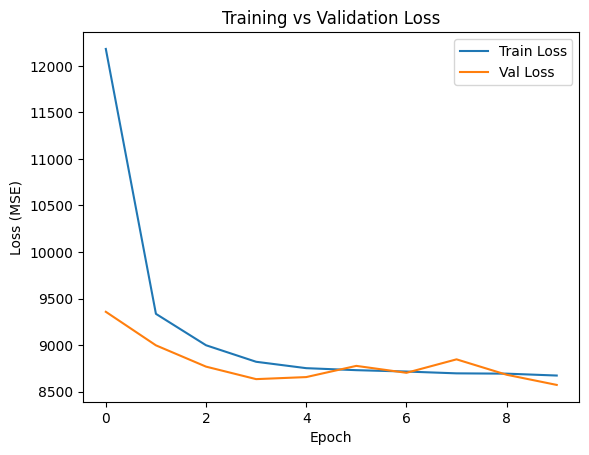

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3)  # Output layer for 3 continuous targets
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
y_test_pred = model.predict(X_test_scaled)

print("TensorFlow Keras Model Evaluation:")
for i in range(3):
    print(f"Output {i+1} - "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i]):.4f}, "
          f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred[:, i]):.4f}")

# Optional: Plot training/validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
